In [1]:
#Author : Hitesh Kumar
# CS286 Final project
# OS : Macbook pro

In [ ]:
import numpy as np
import Bio as Bio
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo
from Bio import Phylo
from Bio.Phylo.Consensus import *
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
import matplotlib
import matplotlib.pyplot as plt
import time as t

In [44]:
#file from muscle

In [45]:
## alignment file from MSA
myFile = "/Users/hiteshkumar/OneDrive - sjsu.edu/Semester-2/CS286/Project-phylo/phylogenetics-master/turtles/MSA_final.txt"
#output from MUSCLE

with open(myFile,"r") as aln: 
    alignment = AlignIO.read(aln,"fasta")
print(type(alignment))

<class 'Bio.Align.MultipleSeqAlignment'>


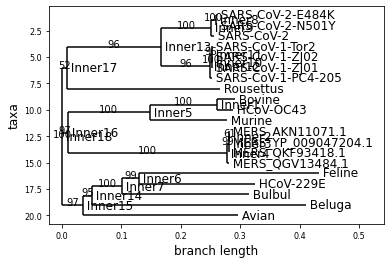

93.77777777777777
total time taken : 48.928521156311035


In [46]:
#Building the tree

calculator = DistanceCalculator('identity') # scope of exp-1
constructor = DistanceTreeConstructor(calculator,method='nj')
#constructor = DistanceTreeConstructor(calculator,method='nj')
trees = bootstrap_trees(alignment, 100, constructor)  ## scope of exp-2

start_time = t.time()
tree = []
tree = list(trees)
target_tree = tree[0]
support_tree = get_support(target_tree, tree)
Phylo.draw(support_tree)
print(np.mean([c.confidence for c in tree[0].find_clades() if c.confidence != None]))
print('total time taken :', t.time()-start_time)

value of model : identity


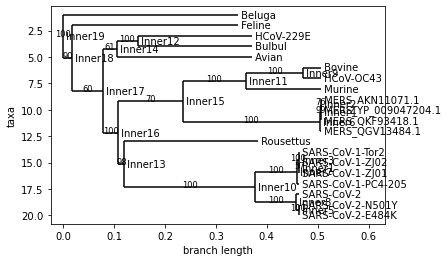

90.05263157894737

value of model : identity


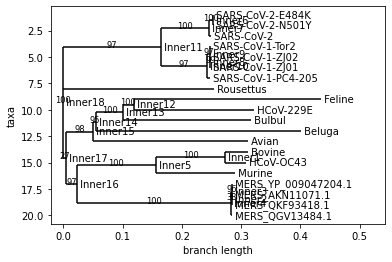

90.88888888888889

value of model : benner22


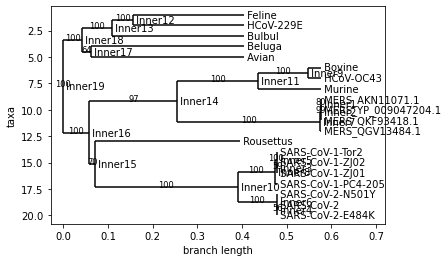

90.78947368421052

value of model : benner22


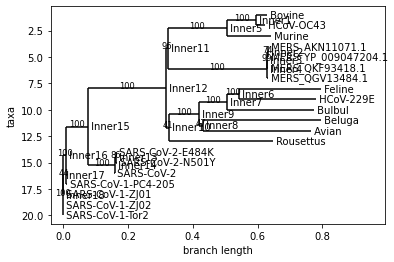

88.16666666666667

value of model : benner6


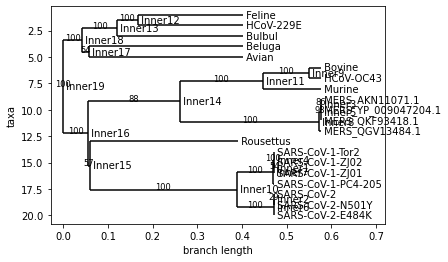

87.6842105263158

value of model : benner6


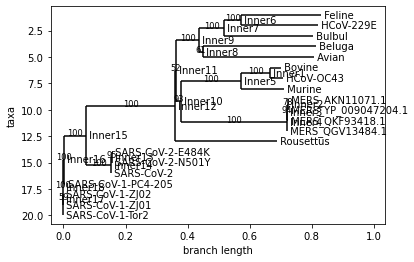

90.66666666666667

value of model : benner74


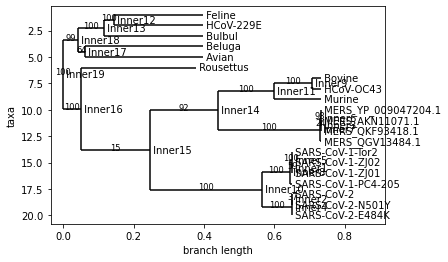

83.57894736842105

value of model : benner74


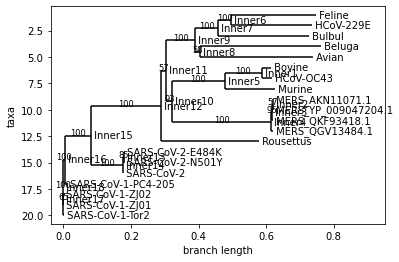

89.5

value of model : dayhoff


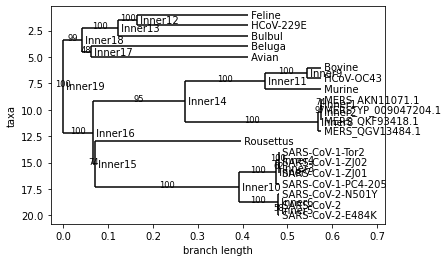

89.84210526315789

value of model : dayhoff


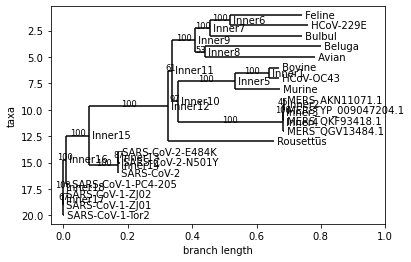

89.44444444444444

value of model : feng


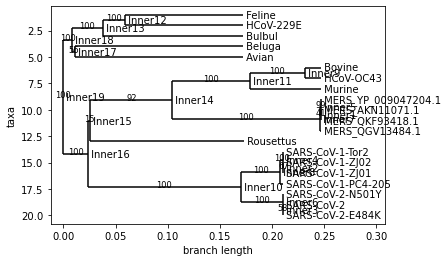

85.42105263157895

value of model : feng


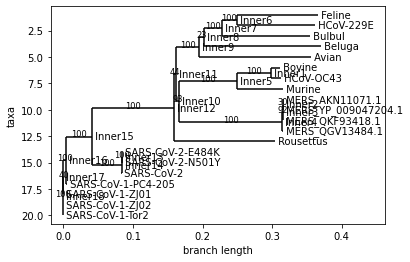

84.55555555555556

value of model : genetic


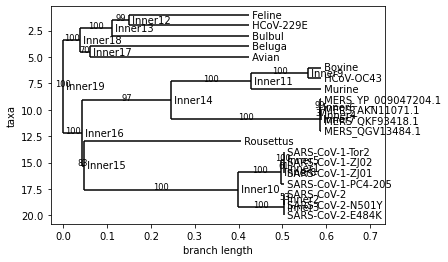

89.42105263157895

value of model : genetic


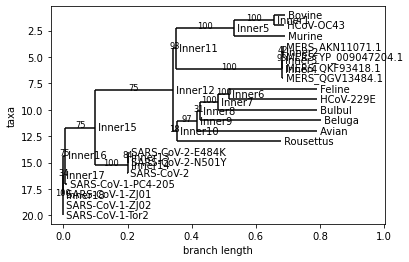

78.72222222222223

value of model : gonnet1992


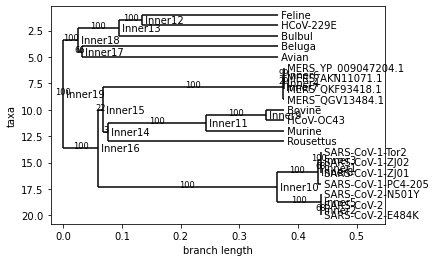

81.57894736842105

value of model : gonnet1992


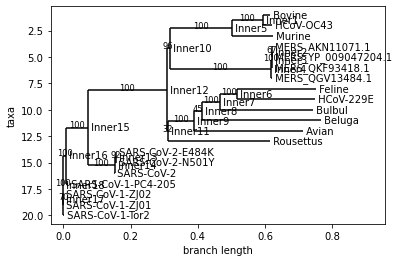

89.0

value of model : hoxd70
value of model : hoxd70
value of model : johnson


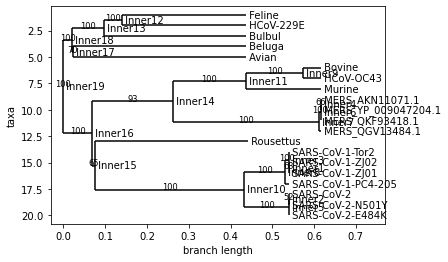

89.94736842105263

value of model : johnson


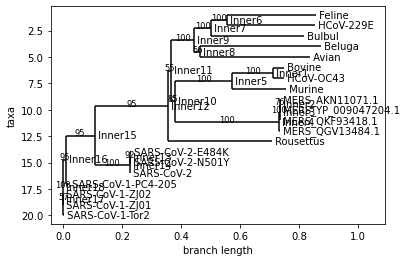

89.22222222222223

value of model : jones


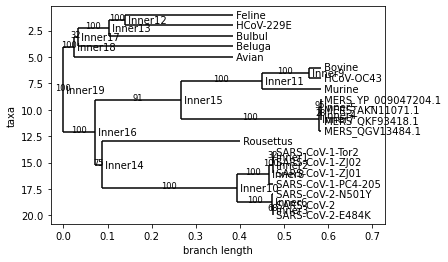

85.05263157894737

value of model : jones


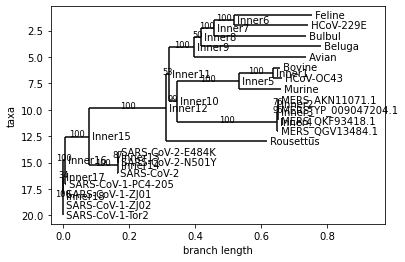

88.61111111111111

value of model : levin


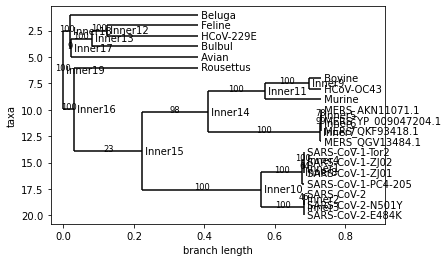

85.10526315789474

value of model : levin


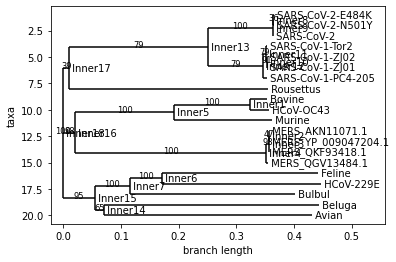

83.66666666666667

value of model : mclachlan


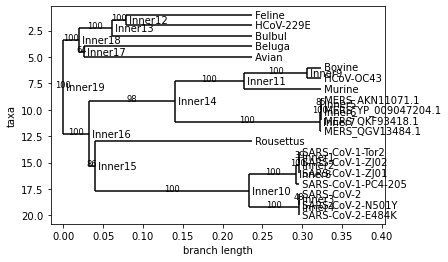

90.52631578947368

value of model : mclachlan


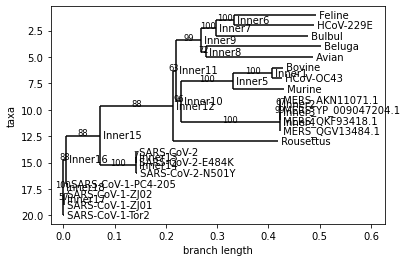

84.66666666666667

value of model : mdm78


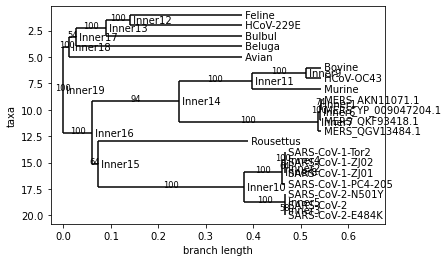

89.89473684210526

value of model : mdm78


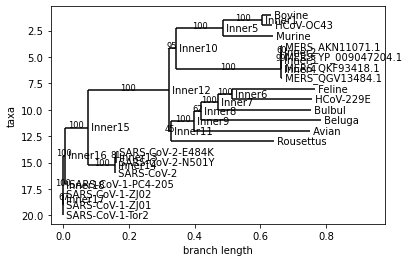

89.38888888888889

value of model : blastn
value of model : blastn
value of model : rao


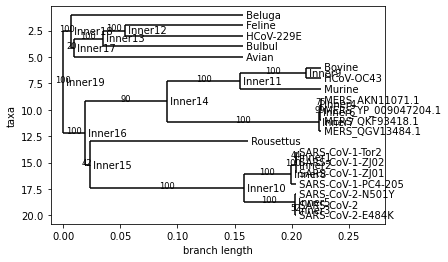

85.36842105263158

value of model : rao


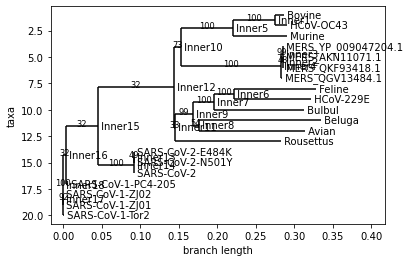

74.33333333333333

value of model : risler


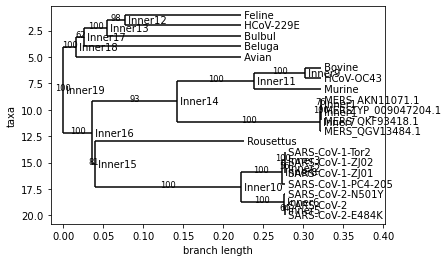

91.05263157894737

value of model : risler


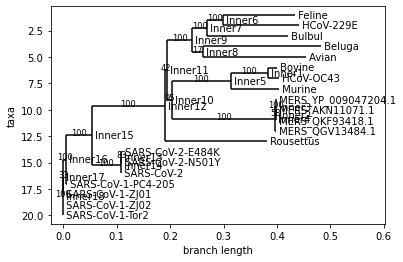

84.88888888888889

value of model : schneider
value of model : schneider
value of model : trans
value of model : trans
value of model : blosum45


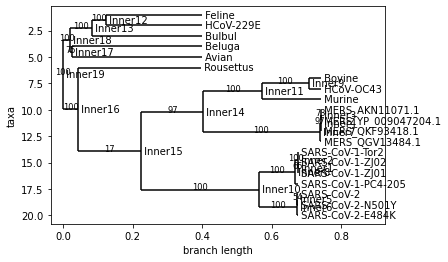

88.3157894736842

value of model : blosum45


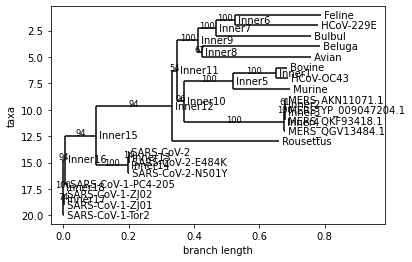

86.0

value of model : blosum50


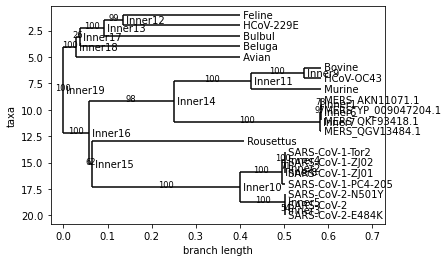

88.42105263157895

value of model : blosum50


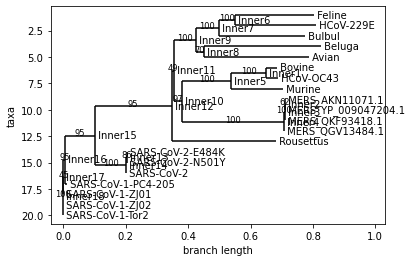

88.55555555555556

value of model : blosum62


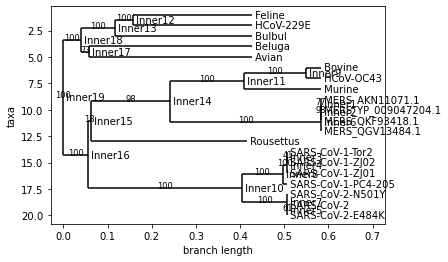

87.6842105263158

value of model : blosum62


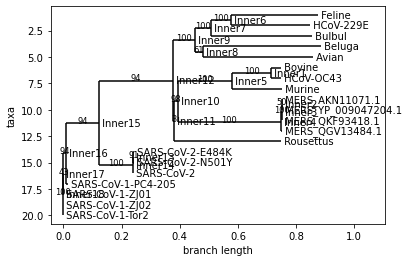

84.88888888888889

value of model : blosum80


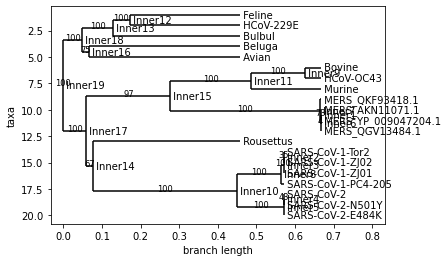

83.89473684210526

value of model : blosum80


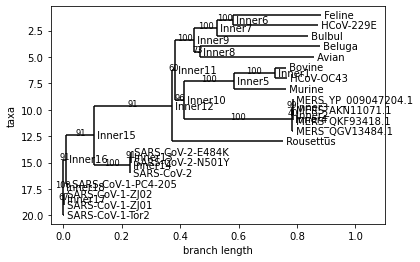

88.83333333333333

value of model : blosum90


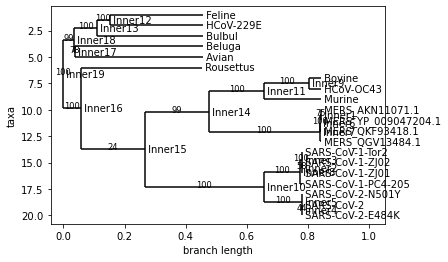

88.26315789473684

value of model : blosum90


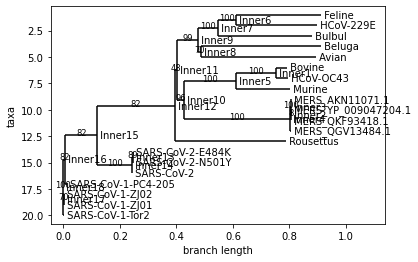

84.77777777777777

value of model : pam250


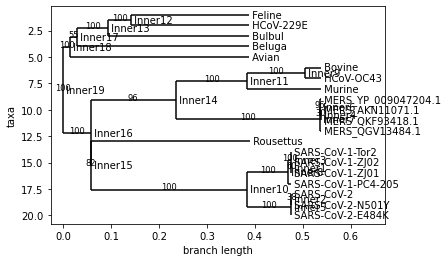

87.21052631578948

value of model : pam250


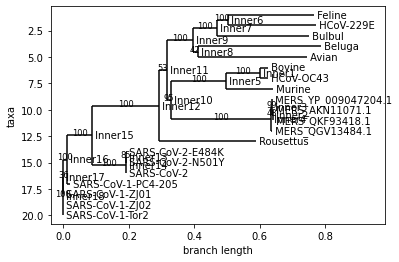

86.55555555555556

value of model : pam30


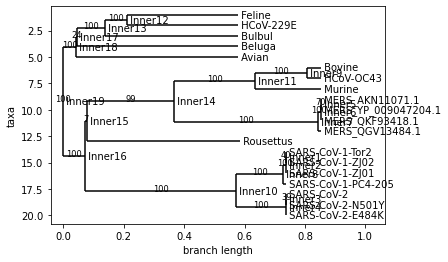

83.10526315789474

value of model : pam30


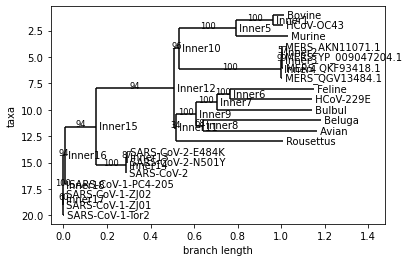

87.94444444444444

value of model : pam70


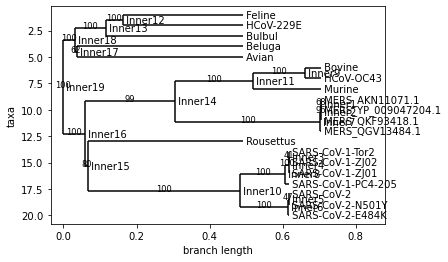

89.10526315789474

value of model : pam70


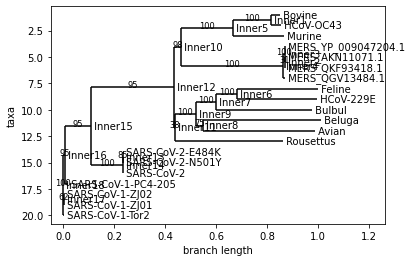

87.44444444444444



In [4]:
#Calculating the confidence 
## checking all ocmbinations
# DistanceCalculator 
model =['identity', 'benner22', 'benner6', 'benner74', 'dayhoff', 'feng', 'genetic', 
        'gonnet1992', 'hoxd70', 'johnson', 'jones', 'levin', 
        'mclachlan', 'mdm78', 'blastn', 'rao', 'risler', 
        'schneider', 'trans', 'blosum45', 'blosum50', 'blosum62', 
        'blosum80', 'blosum90', 'pam250', 'pam30', 'pam70']
#method nj or UPGMA
finalAll =[]
method=['upgma','nj']



for m in model :
    for x in method:
        try:
            temp=[]
            print('value of model :',m)
            temp.append(m)
            calculator = DistanceCalculator(m) # scope of exp-1
            constructor = DistanceTreeConstructor(calculator,method=x)  # method here
            temp.append(x)
            #constructor = DistanceTreeConstructor(calculator,method='nj')
            trees = bootstrap_trees(alignment, 100, constructor)  ## scope of exp-2
            tree = []
            tree = list(trees)
            target_tree = tree[0]
            support_tree = get_support(target_tree, tree)
            Phylo.draw(support_tree)
            print(np.mean([c.confidence for c in tree[0].find_clades() if c.confidence != None]))
            temp.append(np.mean([c.confidence for c in tree[0].find_clades() if c.confidence != None]))
            print('')
            finalAll.append(temp)
        except :
            temp=[]
            temp.append(m)
            temp.append(x)
            temp.append('error occured')
            finalAll.append(temp)


    

In [5]:
finalAll

[['identity', 'upgma', 90.05263157894737],
 ['identity', 'nj', 90.88888888888889],
 ['benner22', 'upgma', 90.78947368421052],
 ['benner22', 'nj', 88.16666666666667],
 ['benner6', 'upgma', 87.6842105263158],
 ['benner6', 'nj', 90.66666666666667],
 ['benner74', 'upgma', 83.57894736842105],
 ['benner74', 'nj', 89.5],
 ['dayhoff', 'upgma', 89.84210526315789],
 ['dayhoff', 'nj', 89.44444444444444],
 ['feng', 'upgma', 85.42105263157895],
 ['feng', 'nj', 84.55555555555556],
 ['genetic', 'upgma', 89.42105263157895],
 ['genetic', 'nj', 78.72222222222223],
 ['gonnet1992', 'upgma', 81.57894736842105],
 ['gonnet1992', 'nj', 89.0],
 ['hoxd70', 'upgma', 'error occured'],
 ['hoxd70', 'nj', 'error occured'],
 ['johnson', 'upgma', 89.94736842105263],
 ['johnson', 'nj', 89.22222222222223],
 ['jones', 'upgma', 85.05263157894737],
 ['jones', 'nj', 88.61111111111111],
 ['levin', 'upgma', 85.10526315789474],
 ['levin', 'nj', 83.66666666666667],
 ['mclachlan', 'upgma', 90.52631578947368],
 ['mclachlan', 'nj'

In [6]:
import pandas as pd

In [7]:
df=pd.DataFrame(finalAll,columns=['model','method','avgBootScore'])

In [8]:
df.head(2)

,model,method,avgBootScore
0,identity,upgma,90.052632
1,identity,nj,90.888889


In [9]:
df.to_excel('/Users/hiteshkumar/OneDrive - sjsu.edu/Semester-2/CS286/Project-phylo/Result/res_newData.xlsx',index=False)

In [ ]:


print(np.mean([c.confidence for c in tree[0].find_clades() if c.confidence != None]))


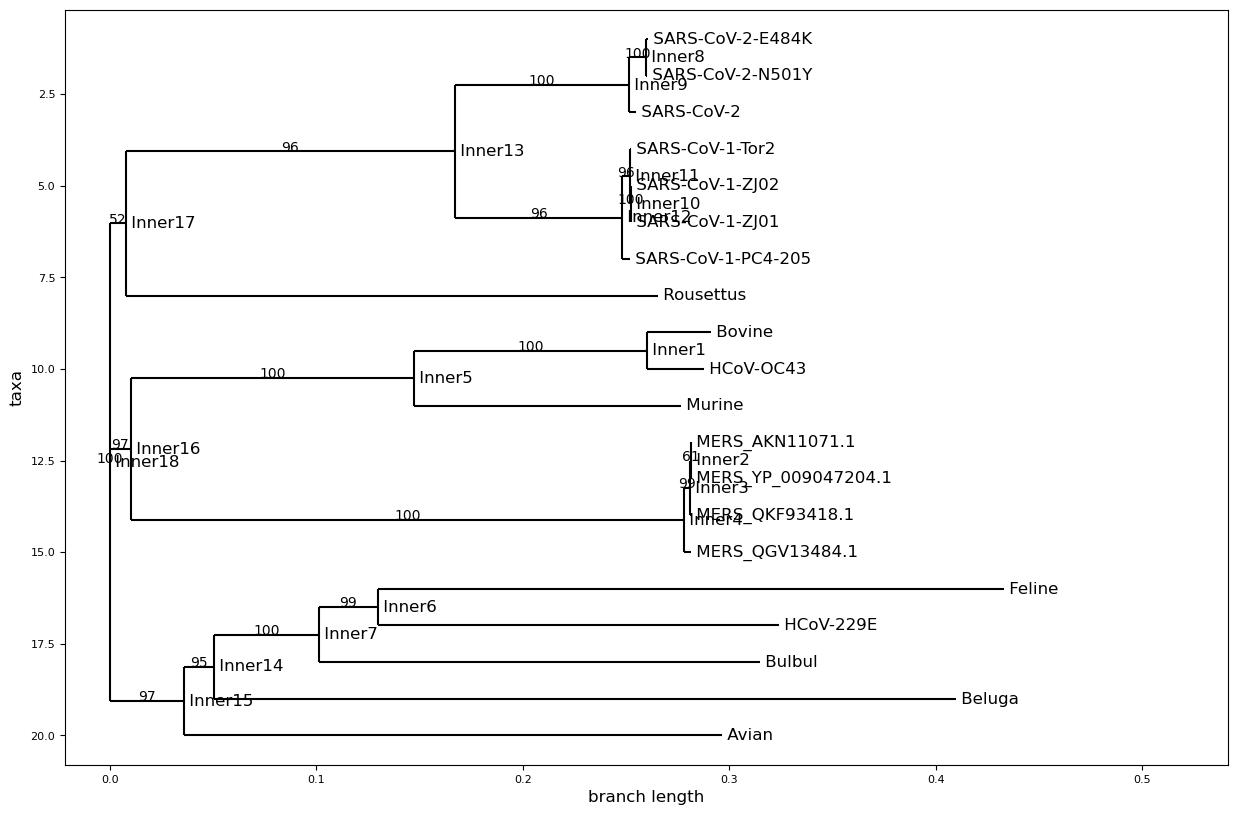

In [47]:
#Building the tree using Matplotlib

fig = plt.figure(figsize=(15, 10), dpi=100) # create figure & set the size 
matplotlib.rc('font', size=12)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=8)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=8)       # fontsize of the tick labels
#turtle_tree.ladderize()
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(support_tree, axes=axes)
